<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data</h1>
</center>

## **Deskripsi**

Menggunakan clustering sebagai salah satu metode feature engineering

## **Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from class_reg_preprocessing import (
    FeatureOutliersHandling,
    FeatureImputer,
    FeatureResampling,
    FeatureLabelEncoder,
    FeatureDiscretizer,
    FeatureRareCategoriesGrouping,
    FeaturePolynomialAdder,
    FeaturePowerTransformer,
    FeatureGroupingNumeric,
    FeatureDimensionReducer,
    FeatureEncoder,
    FeatureScaler,
)

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
data_path = './data'

**Train**

In [3]:
# TODO: define initial dataframes
initial_df = pd.read_csv(f'{data_path}/EV_data.csv')
# -----------------------------------

initial_df

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3375,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2375,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2500,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.3375,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0


**Test**

In [4]:
# # TODO: define test dataframe
# test_features_df = pd.read_csv(f'{data_path}/test_features.csv')

# submisssion_ids = test_features_df['ID']

# test_features_df = test_features_df.drop(columns=['ID'])
# # -------------------------------------

# test_features_df = test_features_df.reindex(sorted(test_features_df.columns), axis=1)

# test_features_df

**Define Target and Features**

In [5]:
# TODO: define which columns are target labels
label = 'label'
# -----------------------------------
# TODO: define which columns are categorical and which are numerical features
categorical_features = ['id']

# get all columns with float64 and int64 data types
numerical_features = initial_df.select_dtypes(include=['float64']).columns
# -----------------------------------


## **Data Preparation**

### **Drop Unnecessary Columns [TENTATIVE]**

In [6]:
# TODO: define columns to drop
columns_to_drop = ['label', 'read_date']
# -----------------------------------

categorical_features = [col for col in categorical_features if col not in columns_to_drop]
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

### **Drop Duplicates**

In [7]:
print('Row count for initial data before removing duplicates:', len(initial_df))
initial_df.drop_duplicates(inplace=True)
print('Row count for initial data after removing duplicates:', len(initial_df))
initial_df.reset_index(drop=True, inplace=True) # Reset the index after dropping duplicates

Row count for initial data before removing duplicates: 4048
Row count for initial data after removing duplicates: 4048


In [8]:
initial_df = initial_df.drop(columns=columns_to_drop)
# test_features_df = test_features_df.drop(columns=columns_to_drop)

#### **Check Similarity Columns between Train and Test**

In [9]:
def is_same_cols(df1: pd.DataFrame, df2: pd.DataFrame, label: str):
    """
    Function to check if two DataFrames have the same columns, excluding the label column if it exists.
    
    Parameters:
    - df1: First DataFrame
    - df2: Second DataFrame
    - label: The name of the label column to exclude from the comparison (default is 'label').
    
    Returns:
    - Boolean value indicating whether the columns are the same, excluding the label column
    """
    # Exclude the label column if it exists in either DataFrame
    df1_cols = df1.columns.drop(label) if label in df1.columns else df1.columns
    df2_cols = df2.columns.drop(label) if label in df2.columns else df2.columns

    # Compare the remaining columns
    return df1_cols.equals(df2_cols)

In [10]:
# print('Initial and test features have the same columns:', is_same_cols(initial_df, test_features_df, label))

### **Grouping by ID**

In [11]:
grouped_df = initial_df.groupby(['id']).mean()

In [12]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   interval_1   88 non-null     float64
 1   interval_2   88 non-null     float64
 2   interval_3   88 non-null     float64
 3   interval_4   88 non-null     float64
 4   interval_5   88 non-null     float64
 5   interval_6   88 non-null     float64
 6   interval_7   88 non-null     float64
 7   interval_8   88 non-null     float64
 8   interval_9   88 non-null     float64
 9   interval_10  88 non-null     float64
 10  interval_11  88 non-null     float64
 11  interval_12  88 non-null     float64
 12  interval_13  88 non-null     float64
 13  interval_14  88 non-null     float64
 14  interval_15  88 non-null     float64
 15  interval_16  88 non-null     float64
 16  interval_17  88 non-null     float64
 17  interval_18  88 non-null     float64
 18  interval_19  88 non-null     float64
 19  interval_20  88

### **Clustering for feature engineering**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

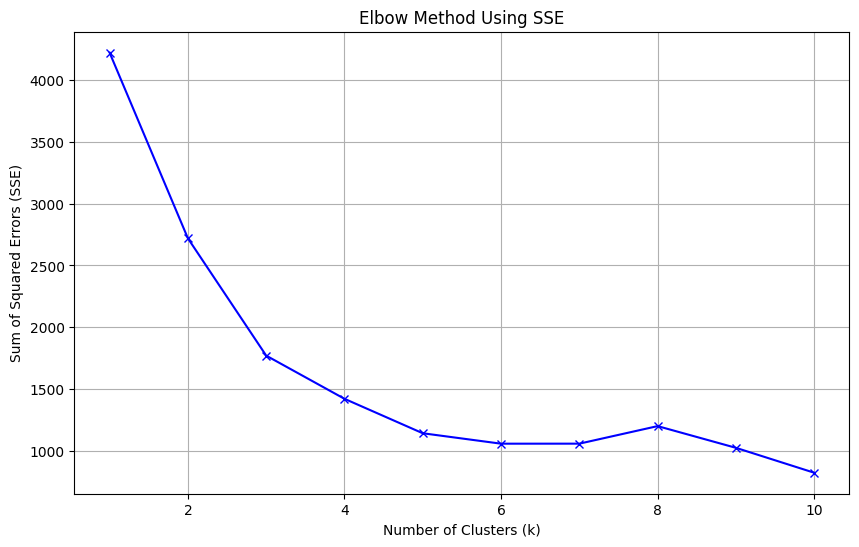

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def elbow_method(df, max_k=10):
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Calculate SSE for different values of k
    sse = []
    K = range(1, max_k+1)
    
    for k in K:
        kmeans = KMeans(K=k, max_iters=100, plot_steps=False)
        labels = kmeans.predict(scaled_features)
        
        # Calculate SSE
        current_sse = 0
        for i, cluster in enumerate(kmeans.clusters):
            if len(cluster) > 0:  # Check if cluster is not empty
                cluster_points = scaled_features[cluster]
                centroid = kmeans.centroids[i]
                current_sse += np.sum((cluster_points - centroid) ** 2)
        
        sse.append(current_sse)
    
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K, sse, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method Using SSE')
    plt.grid(True)
    plt.show()
    
    return sse

# Usage example:
# Assuming initial_df is your pandas DataFrame
sse_values = elbow_method(grouped_df, max_k=10)

In [15]:
def apply_kmeans_clustering(df, n_clusters):
    """
    Apply KMeans clustering to the DataFrame and return the original data
    with cluster assignments added as a new column
    """
    # Create a copy of the DataFrame
    df_with_clusters = df.copy()
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Apply KMeans clustering
    kmeans = KMeans(K=n_clusters, max_iters=100, plot_steps=False)
    cluster_labels = kmeans.predict(scaled_features)
    
    # Add cluster assignments to the DataFrame
    df_with_clusters['cluster'] = cluster_labels
    
    # Add the centroids to a new DataFrame
    centroid_values = scaler.inverse_transform(kmeans.centroids)
    centroids_df = pd.DataFrame(
        centroid_values,
        columns=df.columns,
        index=[f'Cluster_{i}' for i in range(n_clusters)]
    )
    
    return df_with_clusters, centroids_df, kmeans

In [16]:
n_clusters = 3  # Replace with your optimal number from the elbow method
df_clustered, centroids, model = apply_kmeans_clustering(grouped_df, n_clusters)

In [17]:
df_clustered

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,cluster
id,,,,,,,,,,,,,,,,,,,,,
1,0.357178,0.328778,0.167091,0.146717,0.146033,0.143589,0.148480,0.148617,0.146985,0.097946,...,0.145767,0.308674,0.280676,0.447120,0.427693,0.420761,0.421170,0.398348,0.397659,1.0
2,0.931628,0.780407,0.701607,0.587072,0.419270,0.347533,0.226337,0.131765,0.116554,0.118050,...,0.302152,0.280278,0.272800,0.271035,0.253641,0.543993,0.817770,0.901472,0.997396,2.0
3,0.624157,0.633398,0.628098,0.621033,0.582048,0.544943,0.530141,0.471989,0.403635,0.351878,...,0.686526,0.807307,0.792509,0.769272,0.737748,0.796576,0.727561,0.608802,0.557446,2.0
4,0.367772,0.401193,0.398485,0.398617,0.338289,0.298198,0.239520,0.239241,0.246991,0.241822,...,0.499426,0.543993,0.676065,0.690196,0.672387,0.625657,0.464509,0.381902,0.412065,2.0
5,0.139646,0.142496,0.140054,0.131641,0.134761,0.135709,0.129870,0.134491,0.133946,0.128504,...,0.313426,0.319811,0.319135,0.281502,0.238013,0.204322,0.186928,0.163563,0.150385,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.151067,0.131902,0.129867,0.115604,0.120496,0.121446,0.115470,0.120224,0.113020,0.135843,...,0.353367,0.354461,0.371309,0.355409,0.331772,0.228100,0.148207,0.131774,0.138420,1.0
85,0.065565,0.074696,0.072761,0.076957,0.063130,0.072152,0.066196,0.074217,0.061957,0.061348,...,0.129065,0.127674,0.116826,0.177370,0.149761,0.097848,0.079739,0.070326,0.066717,1.0
86,0.527413,0.519674,0.505435,0.595500,0.652348,0.568870,0.681022,0.618652,0.632543,0.503826,...,0.584239,0.538174,0.469870,0.498891,0.524000,0.544304,0.540804,0.542739,0.540413,2.0


In [18]:
#Save clustered data to csv
df_clustered.to_csv(f'{data_path}/clustered_data.csv')

In [19]:
df1 = pd.read_csv(f'{data_path}/EV_data.csv')
df2 = pd.read_csv(f'{data_path}/clustered_data.csv')

merged_df = df1.merge(
    df2[['id', 'cluster']], 
    on='id', 
    how='left'
)

In [20]:
merged_df.to_csv(f'{data_path}/merged_data.csv')

## Train test split

In [21]:
from sklearn.model_selection import train_test_split

# drop read date
merged_df = merged_df.drop(columns=['read_date'])

X = merged_df.drop(columns=[label])
y = merged_df[label]

# X_test = test_features_df
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data:", len(merged_df))
print("Jumlah data train:", len(X_train))
print("Jumlah data validasi:", len(X_val))

Jumlah data: 4048
Jumlah data train: 3238
Jumlah data validasi: 810


## Modelling

### Logistic Regression

In [22]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=200):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [23]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

## Evaluation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       405
           1       0.85      0.91      0.88       405

    accuracy                           0.87       810
   macro avg       0.87      0.87      0.87       810
weighted avg       0.87      0.87      0.87       810

